# Homework 2: Logistic Regression

NetID: sg7993

Loading data and library.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.optimize import fmin_tnc
from numpy import log

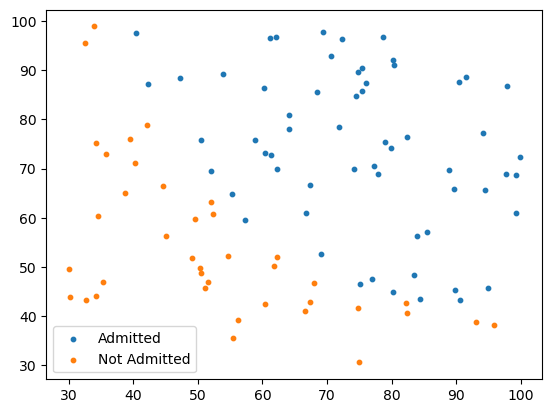

In [2]:
data = pd.read_csv("marks.txt")

# X = feature values, all the columns except the last column
X = data.iloc[:, :-1]
X = np.c_[np.ones((X.shape[0], 1)), X]  ## augment with column of ones
# y = target values, last column of the data frame
y = data.iloc[:, -1].to_numpy()
# select the applicants that got admitted vs. not admitted
admitted = data.loc[y == 1]
not_admitted = data.loc[y == 0]
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.legend()
plt.show()



# Problem 1. Consider the same logistic regression example that was solved in "logistic-regression.pdf" using the built-in method fmin_tnc.

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def prob(theta, x):
    return sigmoid(np.dot(x, theta))


def objective(theta, x, y):
    p = prob(theta, x)
    return -np.sum(y * log(p) + (1 - y) * log(1 - p))


def gradient(theta, x, y):
    # Computes the gradient of the cost function at the point theta 
    return np.dot(x.T, sigmoid(np.dot(x, theta)) - y)


def fit(x, y, theta):
    return fmin_tnc(func=objective, x0=theta, fprime=gradient, args=(x, y))[0]


def accuracy(x, actual_classes):
    predicted_classes = (prob(theta_star, x) >= 0.5).astype(int).flatten()
    return 100 * np.mean(predicted_classes == actual_classes)

In [4]:
theta_star = fit(X, y, np.zeros((X.shape[1], 1)))

  NIT   NF   F                       GTG
    0    1  6.862157087543459E+01   2.84211917E+06
tnc: fscale = 0.00059317
    1    3  6.214125236311505E+01   7.20777561E+03
    2    5  6.205441634501899E+01   1.08733501E+04
    3    7  6.036224289419697E+01   1.62165442E+04
    4    9  6.029361330929159E+01   3.56464013E+04
tnc: stepmx = 1000
    5   12  2.713212008425834E+01   1.46061392E+05
    6   14  2.650328980656224E+01   1.13148641E+05
    7   16  2.592466525754484E+01   1.62890286E+03
tnc: fscale = 0.0247772
    8   18  2.581412898836036E+01   4.36914370E+03
    9   20  2.577973107313391E+01   3.32108187E+01
   10   25  2.176393211777427E+01   1.26610843E+05
   11   27  2.063822283489535E+01   4.87472633E+03
   12   29  2.026420843566388E+01   5.97659516E+02
   13   31  2.025354433127144E+01   4.19100169E+01
   14   33  2.025160547443476E+01   4.95379031E-01
tnc: fscale = 1.42079
   15   35  2.025153042248181E+01   2.01160497E-03
   16   37  2.025152618005004E+01   4.55495157E-01
  

## (a) Code up your own gradient descent optimizer with backtracking line search. 

In [5]:
def backtracking(alpha, beta, theta, g, d, x, y):
    t = 1
    while np.isnan(objective(theta + t * d, x, y)) or objective(theta + t * d, x, y) >= objective(theta, x,
                                                                                                  y) + alpha * t * g.T @ d:
        t = beta * t
    return theta + t * d

In [6]:
objective(theta_star, X, y)

20.251182285860455

## (b) Show that your code from part (a) can get close to the same solution that was found in "logistic-regression.pdf".

In [7]:
# Hide warning message 

import warnings

warnings.filterwarnings("ignore")

theta = np.zeros(X.shape[1])
weights = [theta]
print("Starting object value:", objective(theta, X, y))

for _ in range(200000):
    g = gradient(theta, X, y)
    d = -g
    theta = backtracking(alpha=0.25, beta=0.5, theta=theta, g=g, d=d, x=X, y=y)
    weights.append(theta)
print("After running for some time, the objective vlaue is :", objective(theta, X, y))

Starting object value: 68.62157087543459
After running for some time, the objective vlaue is : 24.719161970609598


In [8]:
print("The objective function from pdf (class solution) is: ", objective(theta_star, X, y))

The objective function from pdf (class solution) is:  20.251182285860455


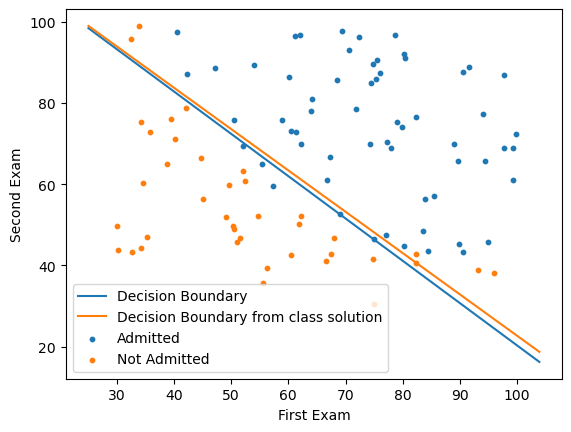

In [9]:
x_values = [np.min(X[:, 1]) - 5, np.max(X[:, 2]) + 5]
y_values = -(theta[0] + np.dot(theta[1], x_values)) / theta[2]
y_values_class = -(theta_star[0] + np.dot(theta_star[1], x_values)) / theta_star[2]
plt.plot(x_values, y_values, label='Decision Boundary')
plt.plot(x_values, y_values_class, label='Decision Boundary from class solution')
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.xlabel('First Exam')
plt.ylabel('Second Exam')
plt.legend()
plt.show()

### Conclusion: 

It can be seen that the objective function value from the class solution and the objective function value from the code are close enough and the decision boundary is also similar.

## (c) 

Collect the sequence of weight vectors that your descent method uses in each of its steps, and plot them, along with the contours of the loss function, as we did in lecture. You do not have to use the same fonts/colours etc. as long as you show the contours, and the steps.

Note -- with two weights and an intercept, each vector in the sequence is three-dimensional. Plotting them is a little more challenging, so get creative! You could try to plot the sequence in three dimensions along these lines:

https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

Or you could do a 2-d plot showing the progression of w, ignoring b, and do the 2-d contours of the loss function with b fixed at its optimal value. 

https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html


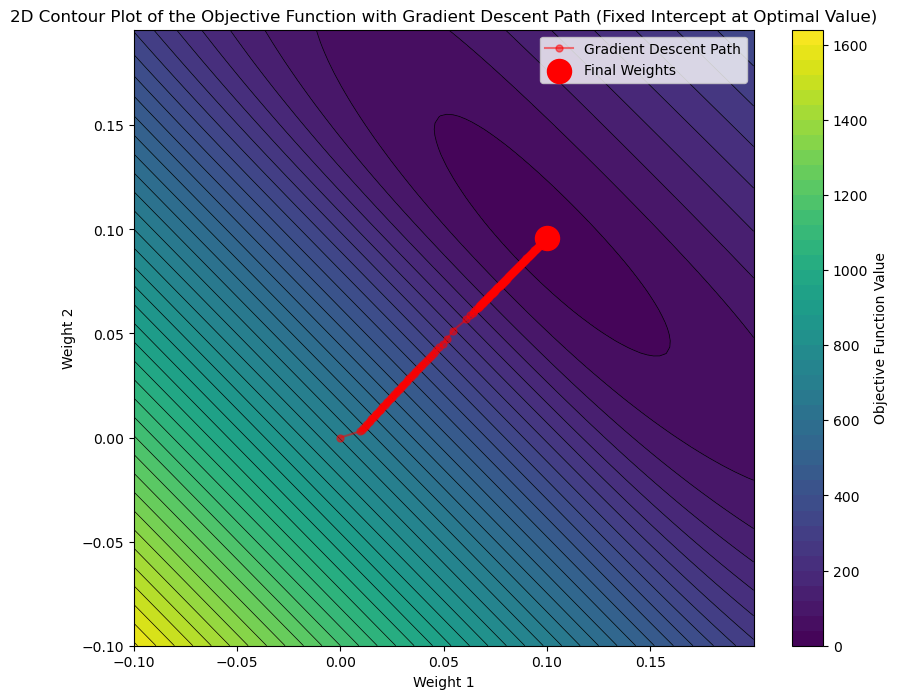

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Fix the intercept value to its optimal value (final value from optimization)
weights = np.array(weights)
optimal_intercept = weights[-1, 0]

# Generate a grid of values for weight 1 and weight 2
w1_range = np.linspace(min(weights[:, 1]) - 0.1, max(weights[:, 1] + 0.1), 100)
w2_range = np.linspace(min(weights[:, 2]) - 0.1, max(weights[:, 2] + 0.1), 100)
W1, W2 = np.meshgrid(w1_range, w2_range)

# Compute the objective function values for the grid of weights with the fixed intercept
Z = np.zeros_like(W1)
for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        Z[i, j] = objective(np.array([optimal_intercept, W1[i, j], W2[i, j]]), X, y)

# Create the 2D contour plot using filled contours and contour lines
plt.figure(figsize=(10, 8))

# Plot the filled contours
contourf = plt.contourf(W1, W2, Z, levels=50, cmap='viridis')
plt.colorbar(contourf, label='Objective Function Value')

# Overlay the contour lines for better visualization of level changes
contour_lines = plt.contour(W1, W2, Z, levels=50, colors='black', linewidths=0.5)

# Plot the optimization path using downsampled weights (ignoring the intercept)
downsampled_weights = weights[::1000]
plt.plot(downsampled_weights[:, 1], downsampled_weights[:, 2], marker='o', color='red', label='Gradient Descent Path',
         alpha=0.5, markersize=5)
plt.scatter(downsampled_weights[-1, 1], downsampled_weights[-1, 2], color='red', s=300, label='Final Weights')

# Labels and plot settings
plt.xlabel('Weight 1')
plt.ylabel('Weight 2')
plt.title('2D Contour Plot of the Objective Function with Gradient Descent Path (Fixed Intercept at Optimal Value)')
plt.legend()
plt.show()

## (d)
 
For the same problem, code up newton's method using the exact Hessian derived in lecture. Show the steps it takes, as you did in part (c) for gradient descent. Compare and contrast -- does it converge to the right solution? does it take more steps? use less overall time? does adding backtracking line search help or hurt the convergence?

In [12]:
def Hessian(theta, x, y):
    # Computes the Hessian of the cost function at the point theta
    p = prob(theta, x)
    W = np.diag(p * (1 - p))
    return x.T @ W @ x

In [13]:
def newton(x, y, tol=1e-6):
    theta = np.zeros(X.shape[1])
    weights = [theta]
    objective_values = [objective(theta, X, y)]
    print("Starting object value:", objective(theta, X, y))

    while True:
        H = Hessian(theta, x, y)
        g = gradient(theta, x, y)
        theta = theta - np.linalg.inv(H) @ g
        weights.append(theta)
        objective_values.append(objective(theta, X, y))
        if np.linalg.norm(gradient(theta, x, y)) < tol:
            break
    print("After running for some time, the objective vlaue is :", objective(theta, X, y))
    return theta, weights, objective_values

In [14]:
theta_star_newton, weights_newton, objective_values = newton(X, y, tol=1e-6)

Starting object value: 68.62157087543459
After running for some time, the objective vlaue is : 20.25118226362694


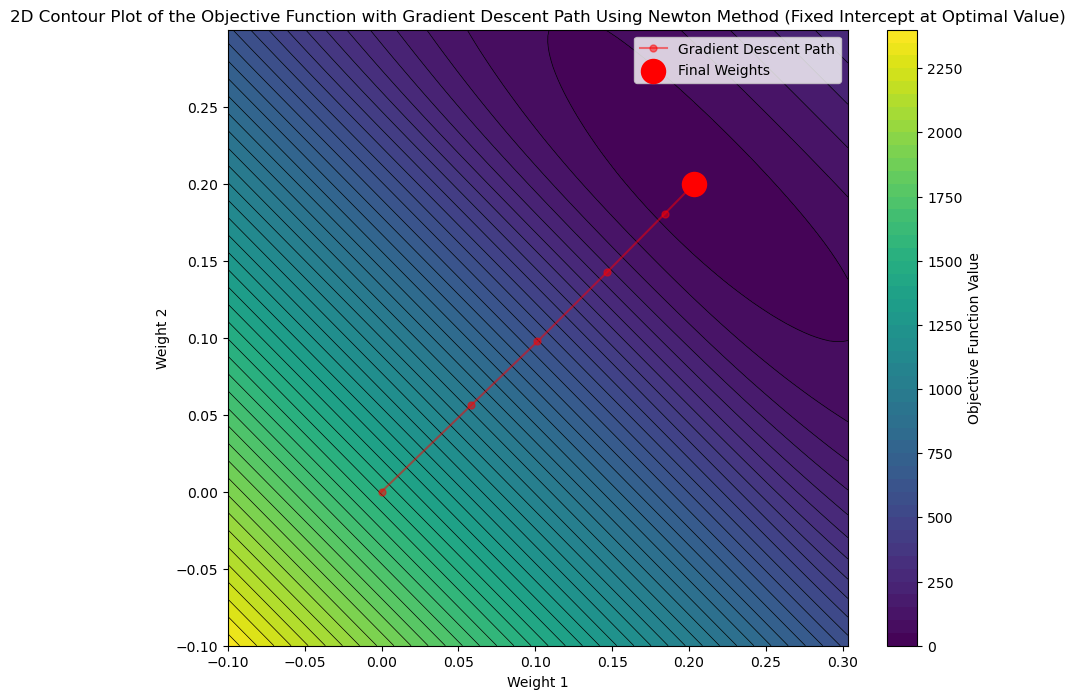

In [15]:
import numpy as np
import matplotlib.pyplot as plt

weights = np.array(weights_newton)

# Fix the intercept value to its optimal value (final value from optimization)
optimal_intercept = weights[-1, 0]

# Generate a grid of values for weight 1 and weight 2
w1_range = np.linspace(min(weights[:, 1]) - 0.1, max(weights[:, 1] + 0.1), 100)
w2_range = np.linspace(min(weights[:, 2]) - 0.1, max(weights[:, 2] + 0.1), 100)
W1, W2 = np.meshgrid(w1_range, w2_range)

# Compute the objective function values for the grid of weights with the fixed intercept
Z = np.zeros_like(W1)
for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        Z[i, j] = objective(np.array([optimal_intercept, W1[i, j], W2[i, j]]), X, y)

# Create the 2D contour plot using filled contours and contour lines
plt.figure(figsize=(10, 8))

# Plot the filled contours
contourf = plt.contourf(W1, W2, Z, levels=50, cmap='viridis')
plt.colorbar(contourf, label='Objective Function Value')

# Overlay the contour lines for better visualization of level changes
contour_lines = plt.contour(W1, W2, Z, levels=50, colors='black', linewidths=0.5)

# Plot the optimization path using downsampled weights (ignoring the intercept)
plt.plot(weights[:, 1], weights[:, 2], marker='o', color='red', label='Gradient Descent Path',
         alpha=0.5, markersize=5)
plt.scatter(weights[-1, 1], weights[-1, 2], color='red', s=300, label='Final Weights')

# Labels and plot settings
plt.xlabel('Weight 1')
plt.ylabel('Weight 2')
plt.title('2D Contour Plot of the Objective Function with Gradient Descent Path Using Newton Method (Fixed Intercept at Optimal Value)')
plt.legend()
plt.show()

Iteration Details for Newton Method

In [16]:
# Total number of iterations
print("Total number of iterations for Newton Method: ", len(weights_newton))


Total number of iterations for Newton Method:  9


## Compare and Contrast

First, comparing the solutions from the class solution and the newton method.

In [17]:
# Compare the objective function values
print("The objective function value from the class solution is: ", objective(theta_star, X, y))
print("The objective function value from the Newton method is: ", objective(theta_star_newton, X, y))


The objective function value from the class solution is:  20.251182285860455
The objective function value from the Newton method is:  20.25118226362694


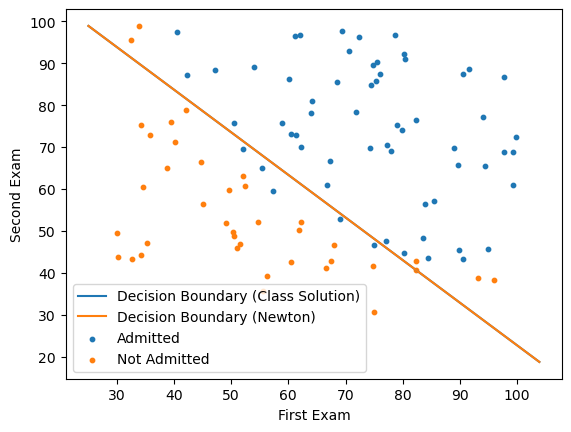

In [18]:
# Compare the decision boundaries
x_values = [np.min(X[:, 1]) - 5, np.max(X[:, 2]) + 5]
y_values = -(theta[0] + np.dot(theta[1], x_values)) / theta[2]
y_values_class = -(theta_star[0] + np.dot(theta_star[1], x_values)) / theta_star[2]
y_values_newton = -(theta_star_newton[0] + np.dot(theta_star_newton[1], x_values)) / theta_star_newton[2]
plt.plot(x_values, y_values_class, label='Decision Boundary (Class Solution)')
plt.plot(x_values, y_values_newton, label='Decision Boundary (Newton)')
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.xlabel('First Exam')
plt.ylabel('Second Exam')
plt.legend()
plt.show()

Notice that the decision boundaries overlap so we cant see the difference.

## Question: Does it converge to the right solution?

In [19]:
final_gradient = gradient(theta_star_newton, X, y)
final_gradient

print("The final gradient norm is: ", np.linalg.norm(final_gradient))

The final gradient norm is:  5.523004553802301e-13


Since the final gradient norm is essentially zero, it means that the Newton method converged to the optimal solution.

# Question: Does it take more steps?

The Newton method took fewer steps to converge to the optimal solution. It took only 9 iterations to converge to the optimal solution.

# Question: Backtracking line search help or hurt the convergence?

Now let us combine the backtracking line search with the Newton method and see how it affects the convergence.

In [20]:
def backtracking_newton(alpha, beta, theta, x, y):
    g = gradient(theta, x, y)
    d = -np.linalg.inv(Hessian(theta, x, y)) @ g
    t = 1
    while np.isnan(objective(theta + t * d, x, y)) or objective(theta + t * d, x, y) >= objective(theta, x, y) + alpha * t * g.T @ d:
        t = beta * t
        print("Backtracking line search t value: ", t)
    return theta + t * d

def newton_backtracking(x, y, tol=1e-6):
    theta = np.zeros(X.shape[1])
    weights = [theta]
    objective_values = [objective(theta, X, y)]
    print("Starting object value:", objective(theta, X, y))

    while True:
        theta = backtracking_newton(alpha=0.25, beta=0.5, theta=theta, x=x, y=y)
        weights.append(theta)
        objective_values.append(objective(theta, X, y))
        if np.linalg.norm(gradient(theta, x, y)) < tol:
            break
    print("After running, the objective vlaue is :", objective(theta, X, y))
    return theta, weights, objective_values

theta_star_newton_backtracking, weights_newton_backtracking, objective_values_newton_backtracking = newton_backtracking(X, y, tol=1e-6)

Starting object value: 68.62157087543459
After running, the objective vlaue is : 20.25118226362694


In [21]:
# Total number of iterations
print("Total number of iterations for Newton Method with Backtracking: ", len(weights_newton_backtracking))
print("Totla number of iterations for Newton Method without Backtracking: ", len(weights_newton))

Total number of iterations for Newton Method with Backtracking:  9
Totla number of iterations for Newton Method without Backtracking:  9


Combining the backtracking line search with the Newton method neither helped nor hurt the convergence since the number of iterations remained the same in our case. The backtracking line search never run. 

But comparing to the previous backtracking line search with gradient descent, the Newton method converge much faster. In fact, the backtracking line search with previous params got trapped and took more iterations to try to get closer to the optimal solution.